In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

In [15]:
data=pd.read_csv("/content/sefanqmfc1oq41t3.csv")

In [16]:
data

,Date,Low,High,Volume,Close,Open
0,1/2/2015,524.09998,531.27002,1446662,524.67999,529.01001
1,1/5/2015,513.06000,524.33002,2054238,513.85999,523.26001
2,1/6/2015,501.04999,516.17499,2891950,501.60999,515.00000
3,1/7/2015,499.64999,507.24399,2059366,501.07999,507.00000
4,1/8/2015,491.00000,503.48001,3344395,502.67999,497.98999
...,...,...,...,...,...,...
1820,3/25/2022,2793.98999,2839.18994,959918,2830.34009,2835.08008
1821,3/28/2022,2796.56274,2839.53003,1182975,2838.50000,2813.68994
1822,3/29/2022,2849.67993,2883.25000,1427189,2864.60010,2863.20996
1823,3/30/2022,2843.36011,2869.61011,1045617,2852.65991,2857.39990


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1825 non-null   object 
 1   Low     1825 non-null   float64
 2   High    1825 non-null   float64
 3   Volume  1825 non-null   int64  
 4   Close   1825 non-null   float64
 5   Open    1825 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 85.7+ KB


In [18]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1825 non-null   datetime64[ns]
 1   Low     1825 non-null   float64       
 2   High    1825 non-null   float64       
 3   Volume  1825 non-null   int64         
 4   Close   1825 non-null   float64       
 5   Open    1825 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 85.7 KB


In [20]:
data.shape

(1825, 6)

In [21]:
data.set_index("Date",inplace=True)

In [22]:
data

,Low,High,Volume,Close,Open
Date,,,,,
2015-01-02,524.09998,531.27002,1446662,524.67999,529.01001
2015-01-05,513.06000,524.33002,2054238,513.85999,523.26001
2015-01-06,501.04999,516.17499,2891950,501.60999,515.00000
2015-01-07,499.64999,507.24399,2059366,501.07999,507.00000
2015-01-08,491.00000,503.48001,3344395,502.67999,497.98999
...,...,...,...,...,...
2022-03-25,2793.98999,2839.18994,959918,2830.34009,2835.08008
2022-03-28,2796.56274,2839.53003,1182975,2838.50000,2813.68994
2022-03-29,2849.67993,2883.25000,1427189,2864.60010,2863.20996


In [23]:
data.isna().sum()

Low       0
High      0
Volume    0
Close     0
Open      0
dtype: int64

In [24]:
data.describe()

,Low,High,Volume,Close,Open
count,1825.000000,1825.000000,1.825000e+03,1825.000000,1825.000000
mean,1261.604962,1286.106848,1.668460e+06,1273.990307,1273.682997
std,654.794386,668.296006,8.098198e+05,661.426772,661.615104
min,487.560000,495.976010,3.457760e+05,492.540010,494.649990
25%,773.580020,782.739990,1.192082e+06,778.159970,779.659970
50%,1086.401980,1110.120000,1.465634e+06,1097.310060,1099.000000
75%,1437.130000,1469.520020,1.909566e+06,1455.620000,1458.780030
max,2997.750000,3042.000000,1.116494e+07,3014.330080,3037.270020


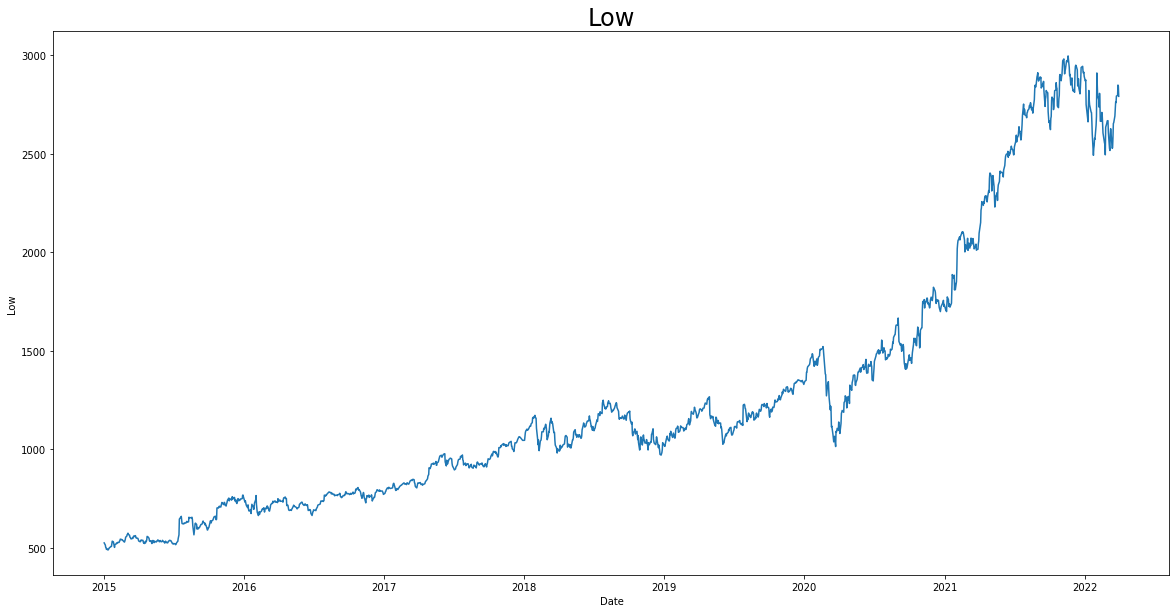

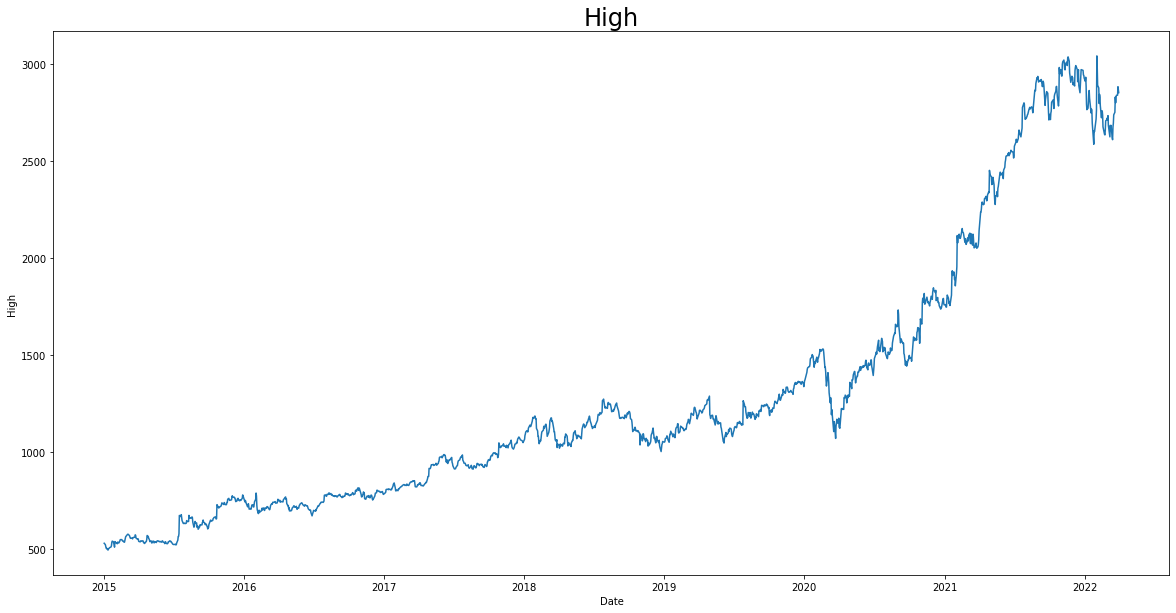

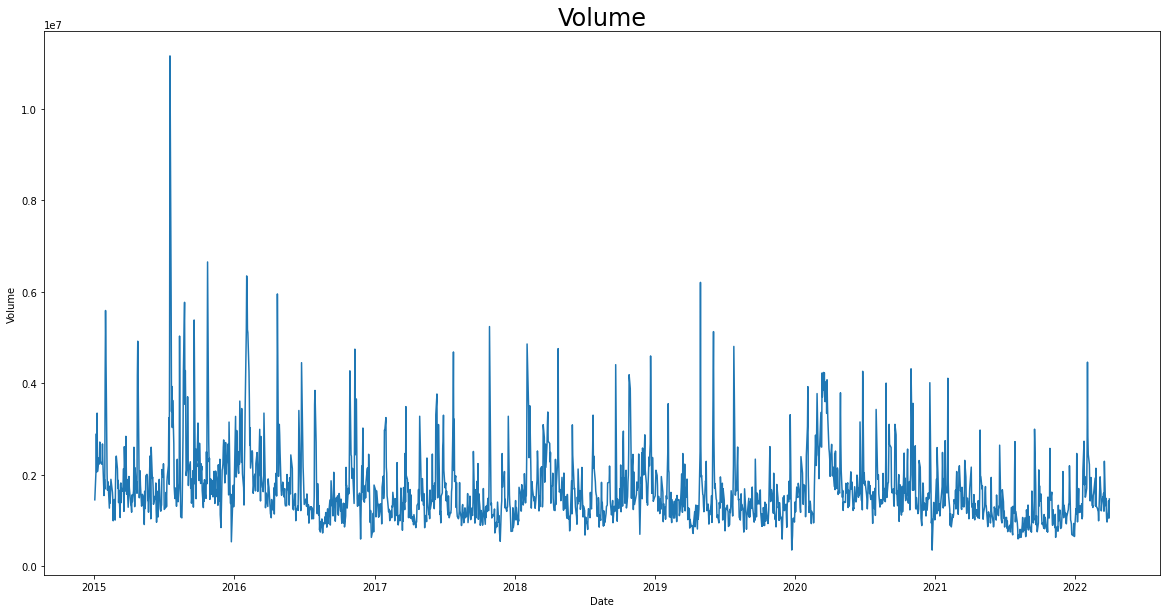

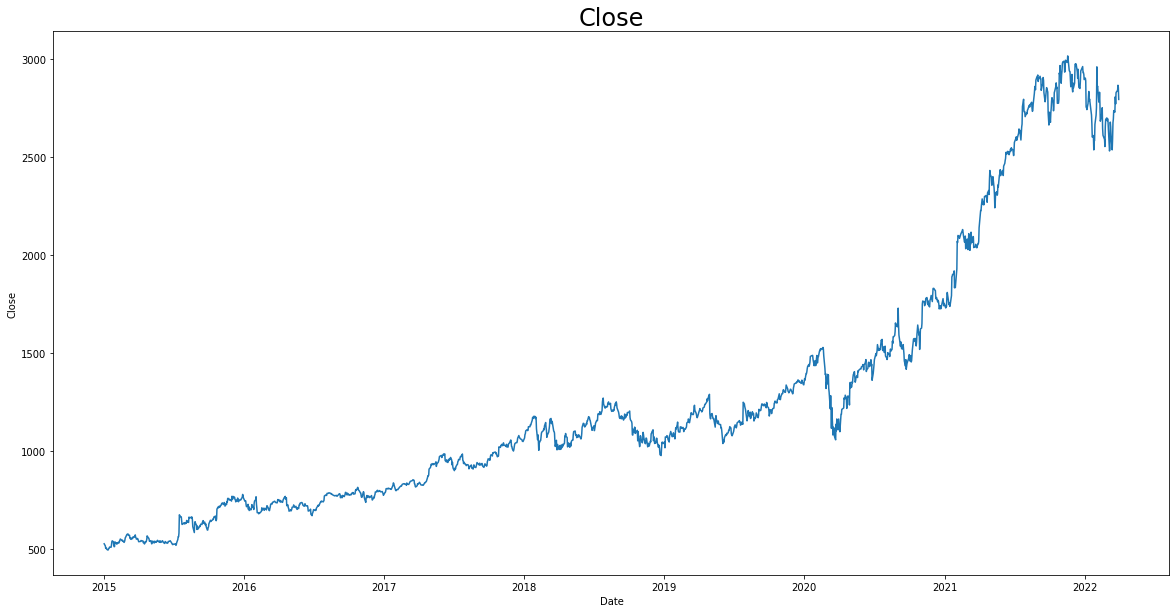

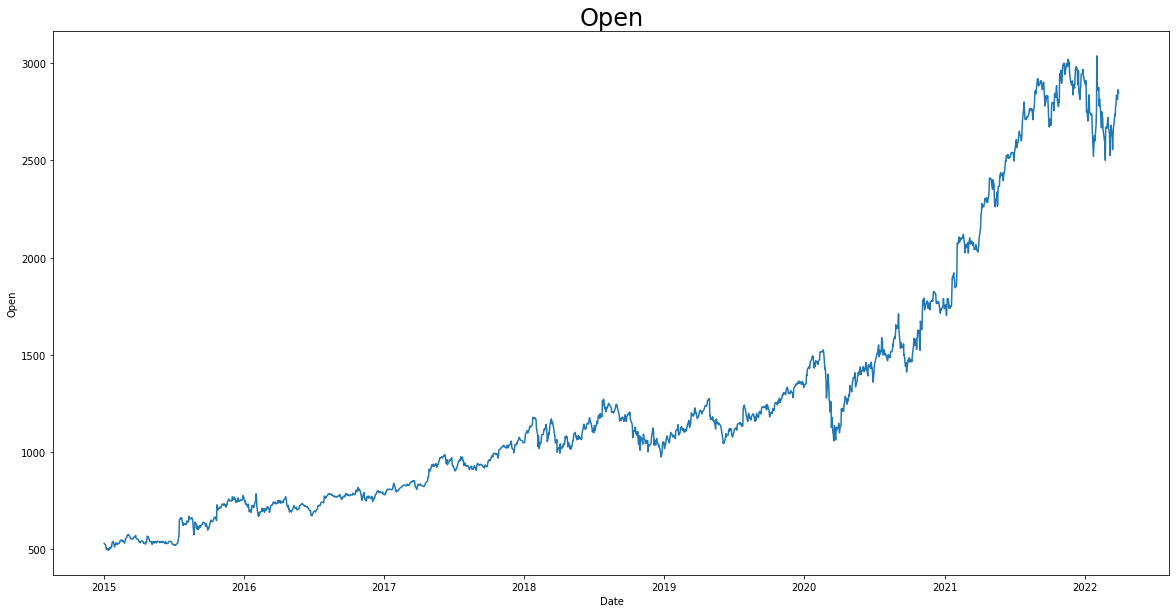

In [25]:
for col in data.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = data.index ,y = data[col],data = data)
    plt.title(col , fontsize=24)
    plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

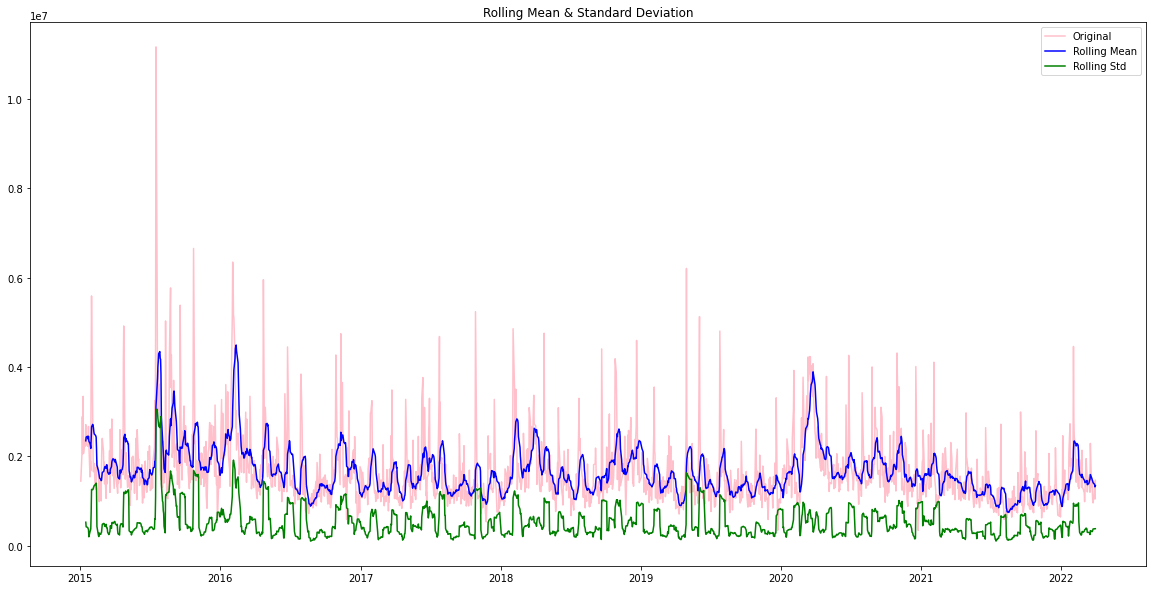

Results of Dickey-Fuller Test:
Test Statistic                -1.213141e+01
p-value                        1.732455e-22
#Lags Used                     4.000000e+00
Number of Observations Used    1.820000e+03
Critical Value (1%)           -3.433948e+00
Critical Value (5%)           -2.863129e+00
Critical Value (10%)          -2.567616e+00
dtype: float64


In [27]:
test_stationarity(data['Volume'])

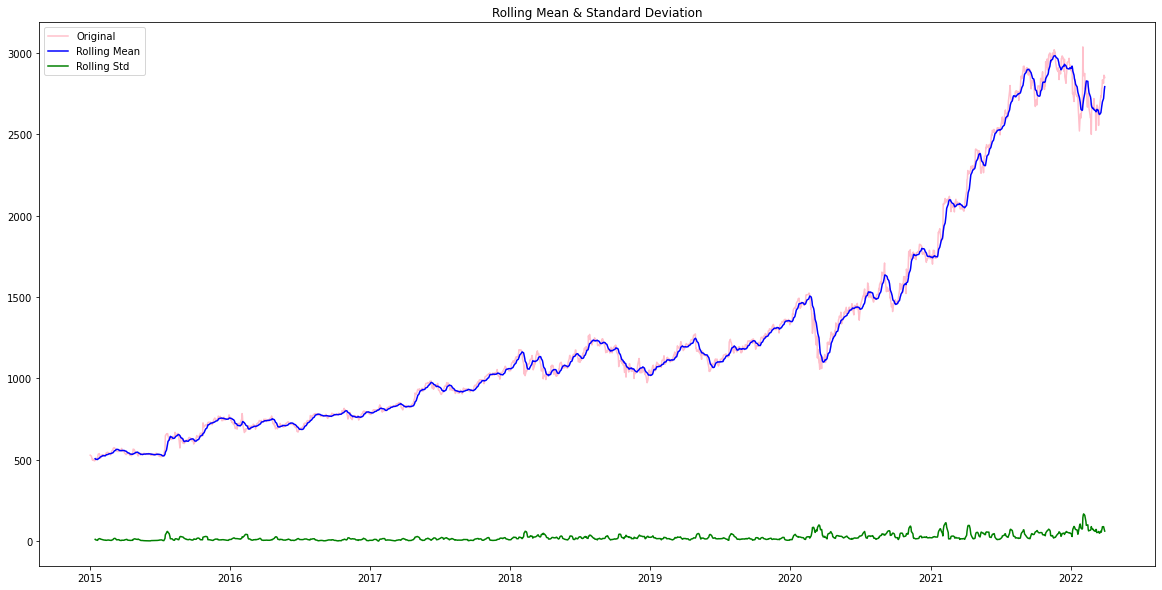

Results of Dickey-Fuller Test:
Test Statistic                    0.897679
p-value                           0.993060
#Lags Used                        4.000000
Number of Observations Used    1820.000000
Critical Value (1%)              -3.433948
Critical Value (5%)              -2.863129
Critical Value (10%)             -2.567616
dtype: float64


In [28]:
test_stationarity(data['Open'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2015-01-02 to 2022-03-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Low     1825 non-null   float64
 1   High    1825 non-null   float64
 2   Volume  1825 non-null   int64  
 3   Close   1825 non-null   float64
 4   Open    1825 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.1 KB


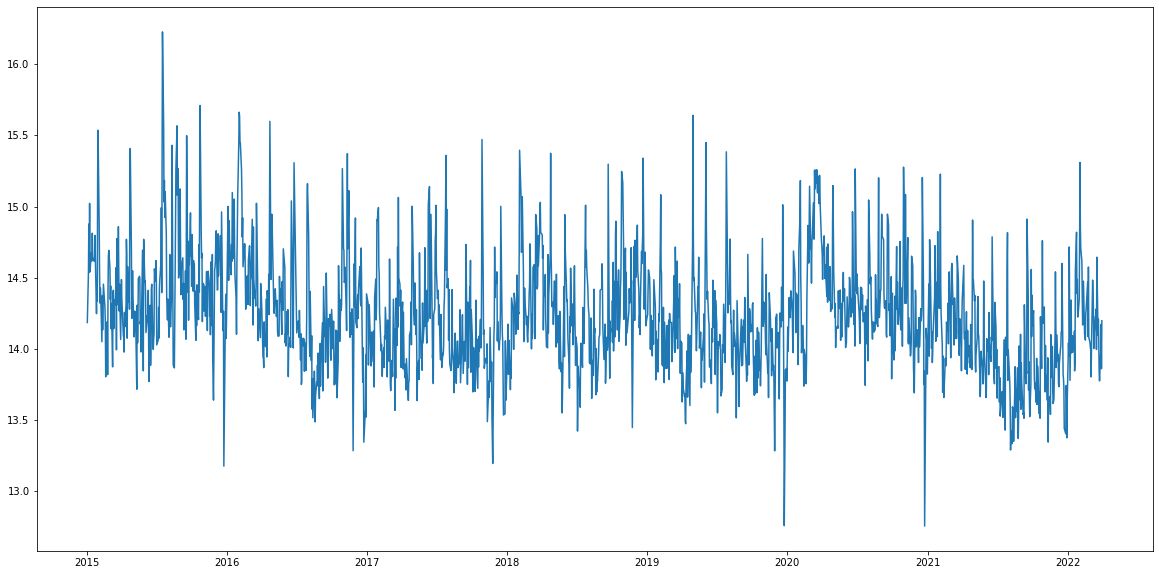

In [30]:
plt.figure(figsize=(20,10))
ts_log=np.log(data['Volume'])
plt.plot(ts_log)

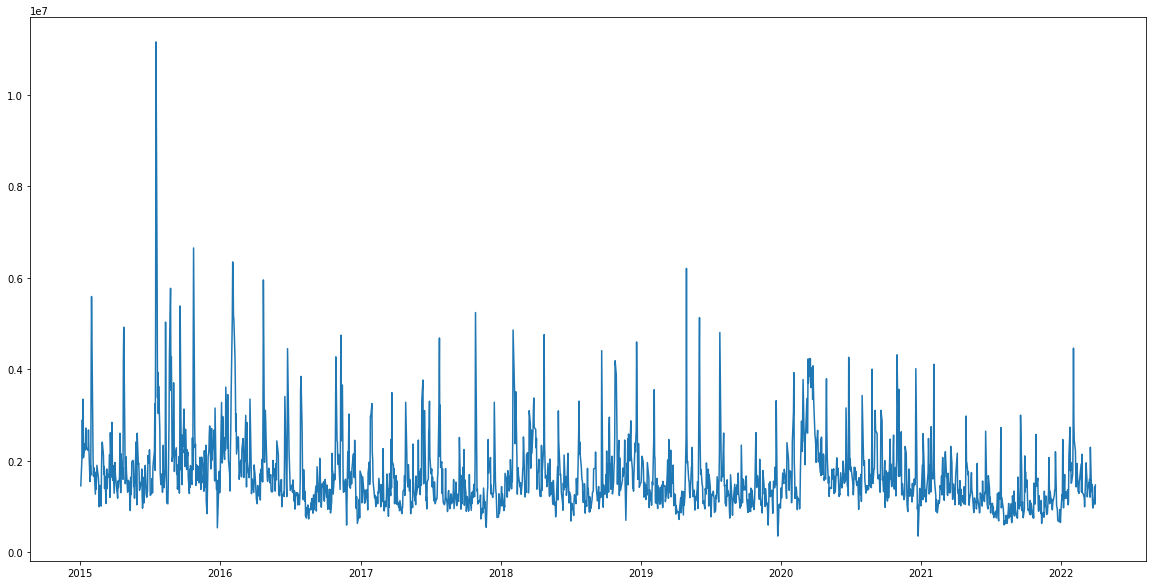

In [31]:
plt.figure( figsize=(20,10) )
plt.plot(data['Volume'])

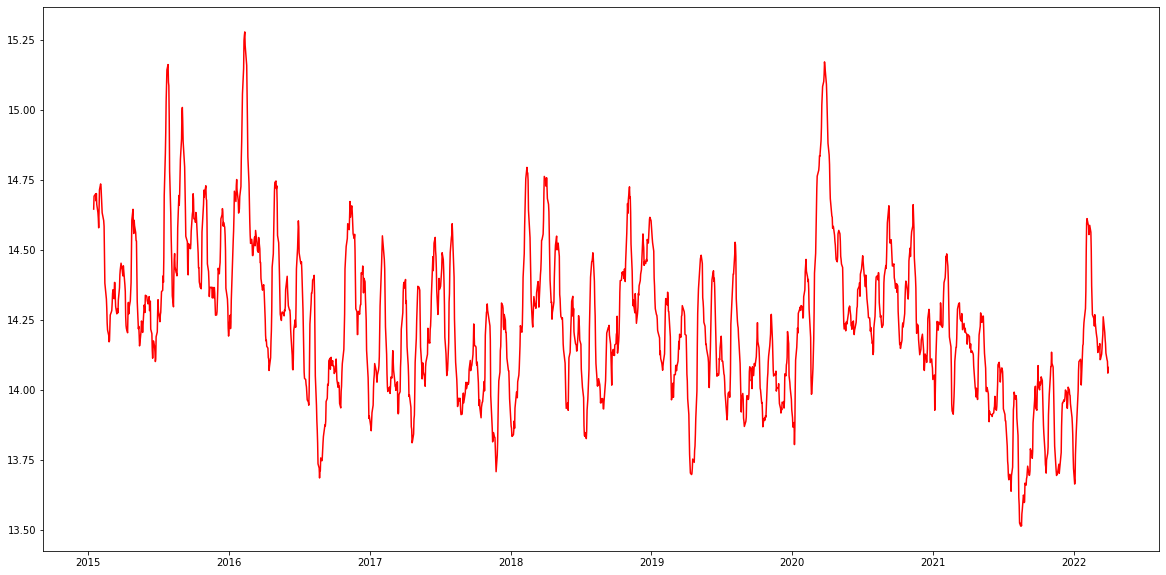

In [32]:
plt.figure(figsize=(20,10))
moving_averge=ts_log.rolling(window = 10).mean()
plt.plot(moving_averge , color='red')

In [33]:
moving_avg_diff= ts_log-moving_averge
moving_avg_diff

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2022-03-25   -0.358172
2022-03-28   -0.124892
2022-03-29    0.068094
2022-03-30   -0.201026
2022-03-31    0.115921
Name: Volume, Length: 1825, dtype: float64

In [34]:
moving_avg_diff.dropna(inplace=True)
moving_avg_diff

Date
2015-01-15    0.166611
2015-01-16   -0.047412
2015-01-20   -0.084711
2015-01-21   -0.043884
2015-01-22    0.095627
                ...   
2022-03-25   -0.358172
2022-03-28   -0.124892
2022-03-29    0.068094
2022-03-30   -0.201026
2022-03-31    0.115921
Name: Volume, Length: 1816, dtype: float64

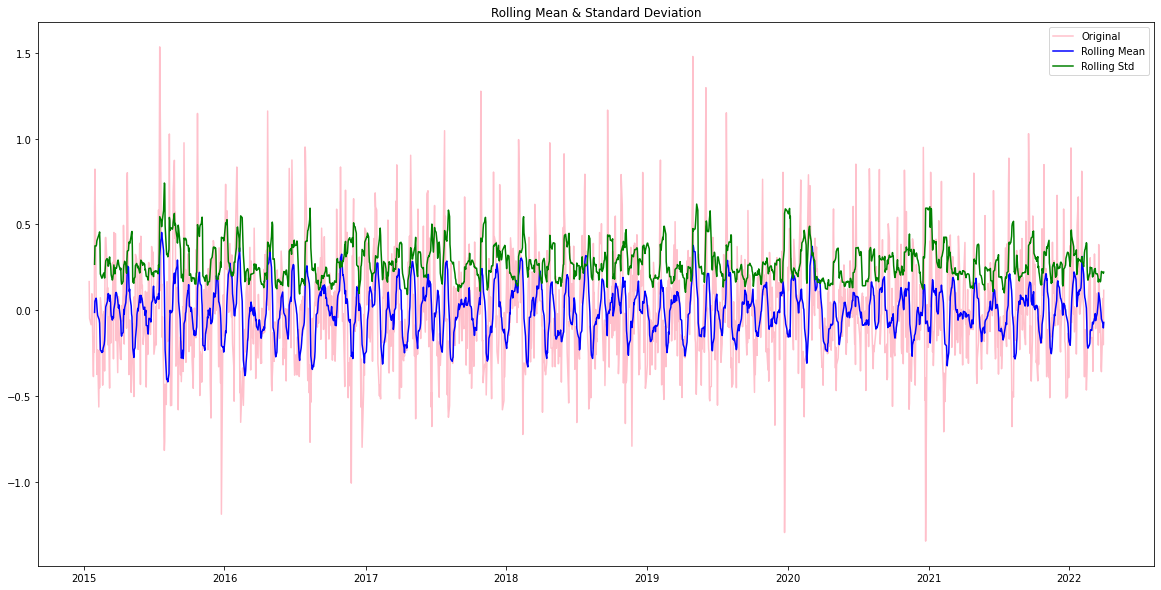

Results of Dickey-Fuller Test:
Test Statistic                -1.387652e+01
p-value                        6.323734e-26
#Lags Used                     2.100000e+01
Number of Observations Used    1.794000e+03
Critical Value (1%)           -3.434000e+00
Critical Value (5%)           -2.863152e+00
Critical Value (10%)          -2.567628e+00
dtype: float64


In [35]:
test_stationarity(moving_avg_diff)

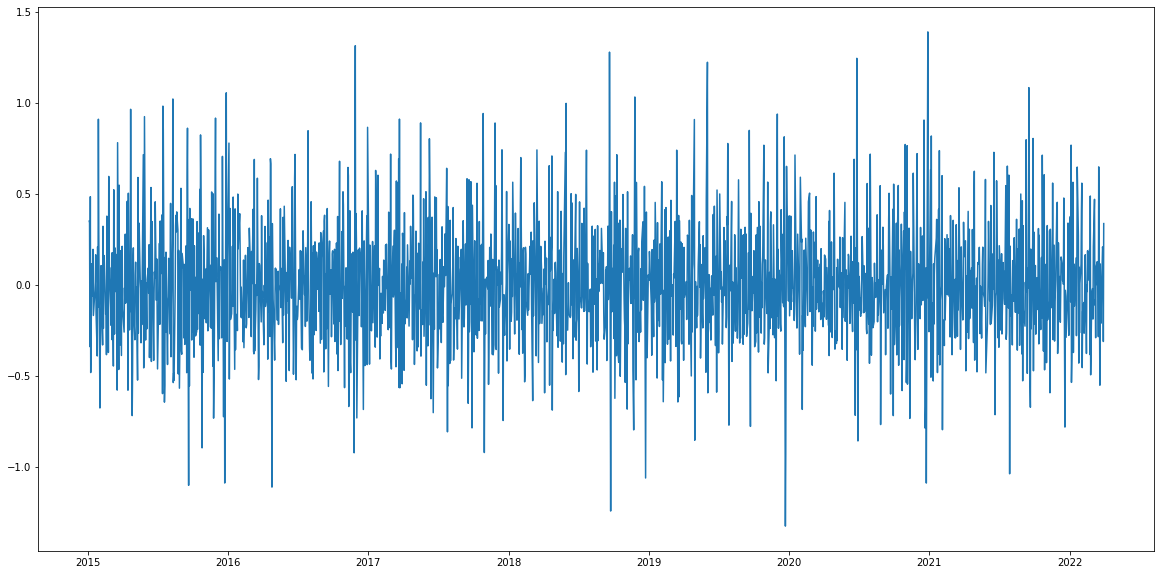

In [36]:
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

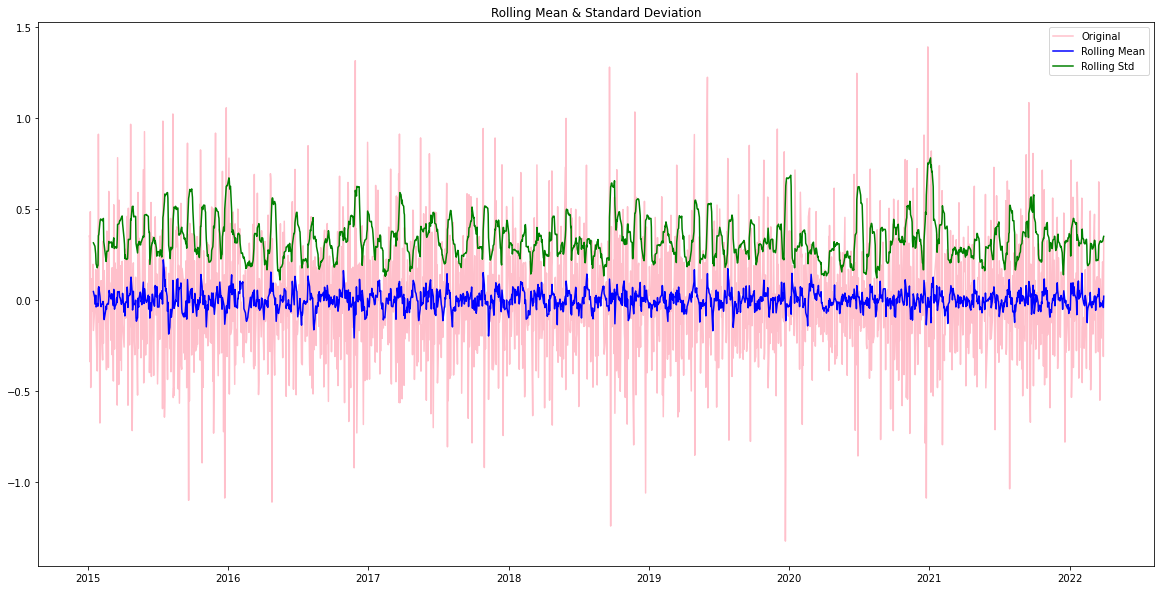

Results of Dickey-Fuller Test:
Test Statistic                -1.418956e+01
p-value                        1.867095e-26
#Lags Used                     2.400000e+01
Number of Observations Used    1.799000e+03
Critical Value (1%)           -3.433990e+00
Critical Value (5%)           -2.863148e+00
Critical Value (10%)          -2.567626e+00
dtype: float64


In [37]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

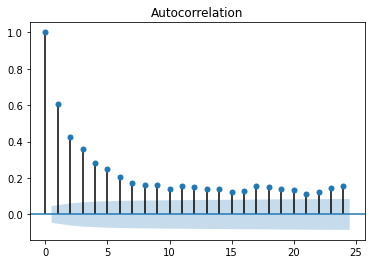

<Figure size 1440x720 with 0 Axes>

In [38]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

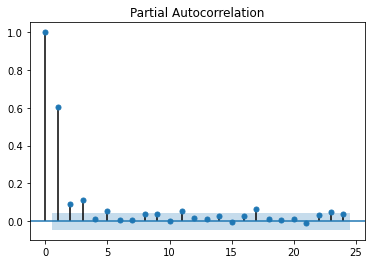

<Figure size 1440x720 with 0 Axes>

In [39]:
tsaplots.plot_pacf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1825
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26967.789
Date:                Wed, 30 Nov 2022   AIC                          53943.579
Time:                        18:18:46   BIC                          53965.614
Sample:                             0   HQIC                         53951.707
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6310      0.035     17.932      0.000       0.562       0.700
ma.L1         -1.1083      0.040    -27.674      0.000      -1.187      -1.030
ma.L2          0.1272      0.037      3.439      0.0

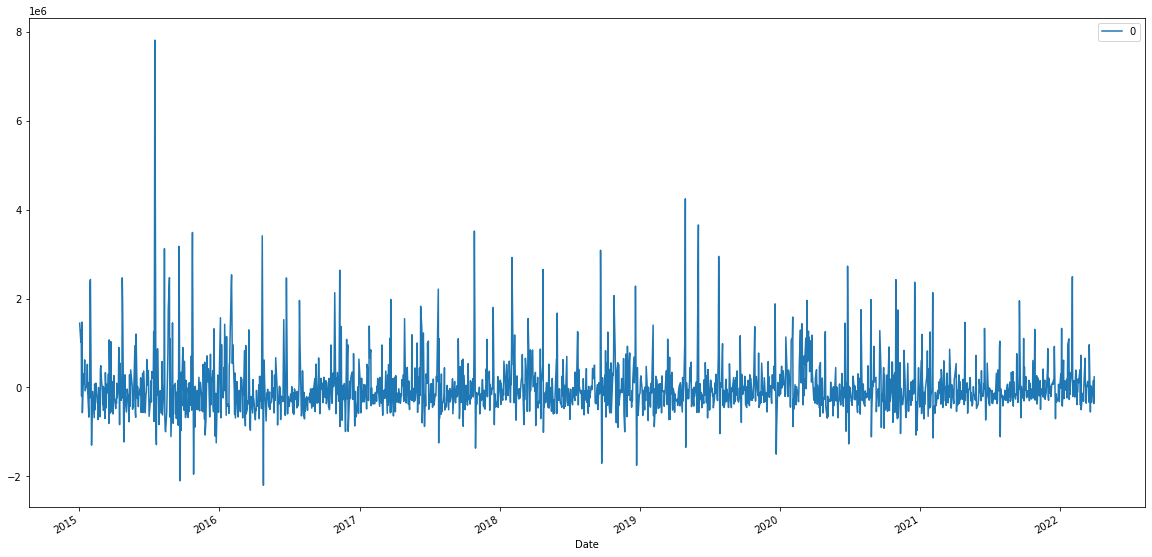

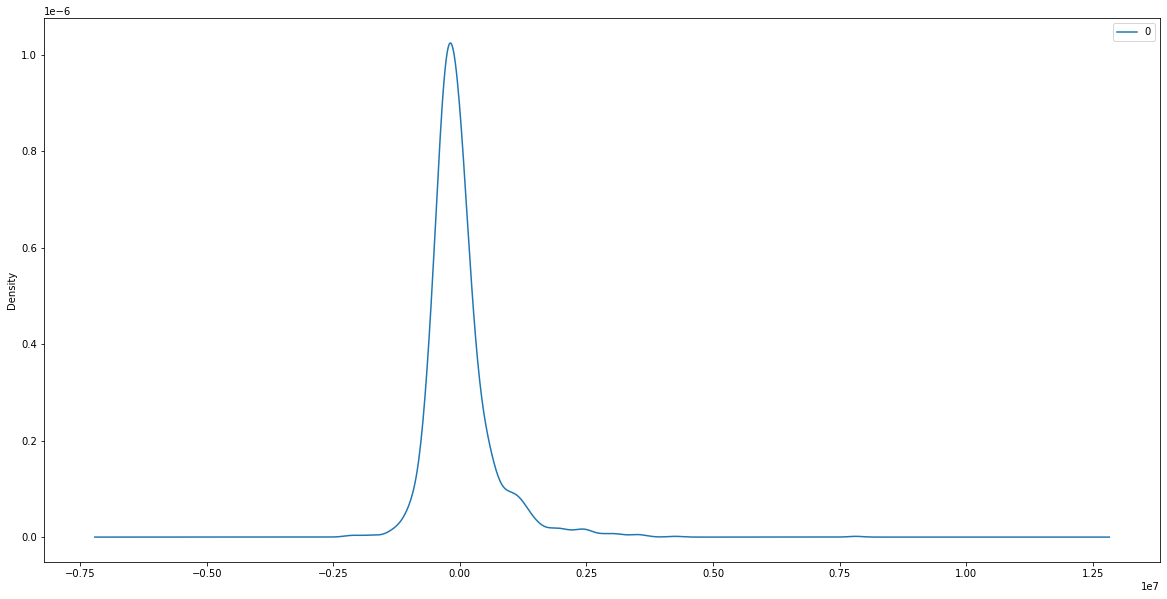

                  0
count  1.825000e+03
mean  -3.059790e+03
std    6.382832e+05
min   -2.200865e+06
25%   -3.422075e+05
50%   -1.190815e+05
75%    1.644165e+05
max    7.819522e+06


In [40]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())